In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [171]:
df= pd.read_csv("C:\\Users\\G V Swetha\\Desktop\\spam_new.csv")
df                

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [172]:
def get_len(text):
    return len(text)

In [173]:
#df.drop(['len_doc'])
df['ML']=df['text'].apply(lambda text: get_len(text))

#df['ML']=df['text'].apply(get_len)

df.head()

,target,text,ML
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [174]:
def num_words(text):
    return len(text.split())
    

In [175]:
df['NW']=df['text'].apply(lambda message:num_words(message))
df.head()

,target,text,ML,NW
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [176]:
def get_short_words(x):
    counter=0
    #x="this is string"
    xs=x.split()
    for word in xs:
        if len(word)<=3:
            counter=counter+1
            
    return counter       
        
        
    



In [177]:
df['NW3']= df['text'].apply(lambda message:get_short_words(message))

In [178]:
df.head()

,target,text,ML,NW,NW3
0,0,"Go until jurong point, crazy.. Available only ...",111,20,6
1,0,Ok lar... Joking wif u oni...,29,6,3
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,12
3,0,U dun say so early hor... U c already then say...,49,11,6
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,5


In [179]:
df['RNW3']=df['NW3']/df['NW']

In [180]:
df.head()

,target,text,ML,NW,NW3,RNW3
0,0,"Go until jurong point, crazy.. Available only ...",111,20,6,0.300000
1,0,Ok lar... Joking wif u oni...,29,6,3,0.500000
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,12,0.428571
3,0,U dun say so early hor... U c already then say...,49,11,6,0.545455
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,5,0.384615


In [181]:
def count_ucw(text):
    import re
    result=re.findall(r'[A-Z]+',text)
    return len(result)
            


                      

In [182]:
df['NCW']=df['text'].apply(lambda message:count_ucw(message))
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  5572 non-null   int64  
 1   text    5572 non-null   object 
 2   ML      5572 non-null   int64  
 3   NW      5572 non-null   int64  
 4   NW3     5572 non-null   int64  
 5   RNW3    5572 non-null   float64
 6   NCW     5572 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 304.8+ KB


In [183]:
x_var = ['ML', 'NW', 'NW3', 'RNW3', 'NCW']
y_var = ['target']
x = df[x_var]
y = df[y_var]


In [184]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
print('Train X: ', x_train.shape)
print('Test X: ', x_test.shape)
print('Train Y: ', y_train.shape)
print('Test Y: ', y_test.shape)

Train X:  (4457, 5)
Test X:  (1115, 5)
Train Y:  (4457, 1)
Test Y:  (1115, 1)


In [185]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)

C:\Users\G V Swetha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB()

In [186]:
from sklearn.metrics import accuracy_score
pred_nb=nb.predict(x_test)
score_nb=accuracy_score(y_test,pred_nb)
score_nb


0.884304932735426

In [187]:
from sklearn.metrics import confusion_matrix
y_pred = nb.predict(x_test)
print(confusion_matrix(y_test, pred_nb))

[[908  41]
 [ 88  78]]


In [188]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_svm=svm.predict(x_test)
score_svm=accuracy_score(y_test,pred_svm)
score_svm

C:\Users\G V Swetha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9076233183856502

In [189]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(x_test)
print(confusion_matrix(y_test, pred_svm))

[[921  28]
 [ 75  91]]


<ipython-input-190-7fc294f97587>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RF Accuracy:  0.9345291479820628
[[923  26]
 [ 47 119]]


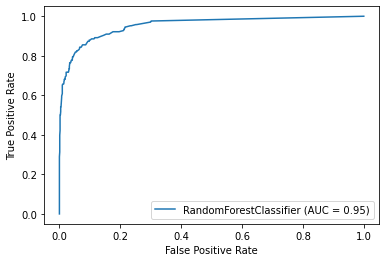

In [190]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
    
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
score_rf=accuracy_score(y_test,pred_rf)
print("RF Accuracy: ",score_rf)
    
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
print(confusion_matrix(y_test, pred_rf))
    
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf, pos_label=1)
metrics.plot_roc_curve(rf, x_test, y_test)

DL Accuracy:  0.8511210762331839
[[949   0]
 [166   0]]


C:\Users\G V Swetha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


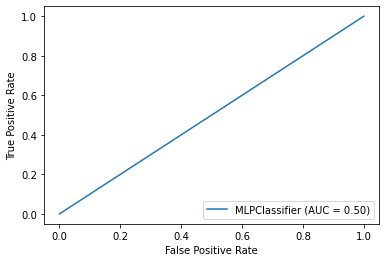

In [191]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
    
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
dl=dl=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
dl.fit(x_train,y_train)
pred_dl=dl.predict(x_test)
score_dl=accuracy_score(y_test,pred_dl)
print("DL Accuracy: ",score_dl)
    
from sklearn.metrics import confusion_matrix
y_pred = dl.predict(x_test)
print(confusion_matrix(y_test, pred_dl))
    
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf, pos_label=1)
metrics.plot_roc_curve(dl, x_test, y_test)